In [24]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt

In [103]:
resto_paris = pd.read_excel("20210209-terrasses-estivales-analyses-demandes.xlsx")
gdf_resto_paris = gpd.GeoDataFrame(resto_paris,
                                         geometry=gpd.points_from_xy(resto_paris.Longitude, resto_paris.Latitude))

In [17]:
arbre_paris = pd.read_csv("les-arbres-plantes.csv", sep=";")

In [32]:
fp = "les-arbres-plantes.geojson"
arbre_paris = gpd.read_file(fp)

Text(0.5, 1.0, 'Représentation des plantations en bleu et des établissement demandeurs de demande de térasse en orange')

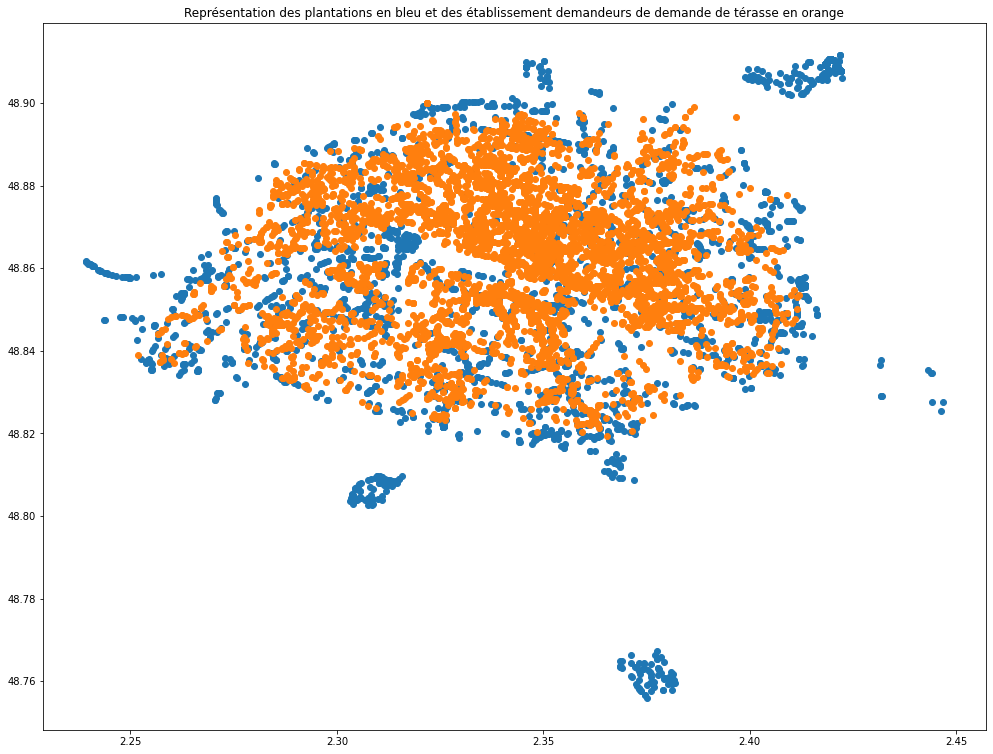

In [48]:
fig, ax = plt.subplots(figsize = (18,13)) 
arbre_paris.plot(ax=ax, label="Arbres plantés à Paris")
gdf_resto_paris.plot(ax=ax, label="Etablissement demandeur de")
ax.set_title("Représentation des plantations en bleu et des établissement demandeurs de térasse en orange")

In [59]:
labels, counts = np.unique(arbre_paris["genre"], return_counts=True)
labels[np.where(counts == max(counts))]

array(['Platanus'], dtype=object)

In [60]:
print(labels, counts)

['Abies' 'Acer' 'Aesculus' 'Alangium' 'Albizia' 'Alnus' 'Amelanchier'
 'Araucaria' 'Betula' 'Broussonetia' 'Butia' 'Caragana' 'Carpinus'
 'Catalpa' 'Cedrus' 'Celtis' 'Cercis' 'Chamaecyparis' 'Clerodendrum'
 'Cornus' 'Corylus' 'Crataegus' 'Cupressus' 'Cydonia' 'Davidia' 'Fagus'
 'Ficus' 'Fraxinus' 'Ginkgo' 'Gleditsia' 'Gymnocladus' 'Halesia' 'Ilex'
 'Juglans' 'Juniperus' 'Koelreuteria' 'Lagerstroemia' 'Larix' 'Ligustrum'
 'Liquidambar' 'Liriodendron' 'Maclura' 'Magnolia' 'Malus' 'Melia'
 'Mespilus' 'Metasequoia' 'Morus' 'Non spécifié' 'Olea' 'Ostrya'
 'Parrotia' 'Paulownia' 'Photinia' 'Pinus' 'Platanus' 'Populus' 'Prunus'
 'Ptelea' 'Pterocarya' 'Pyrus' 'Quercus' 'Robinia' 'Salix' 'Sophora'
 'Sorbus' 'Taxus' 'Tetradium' 'Tilia' 'Toona' 'Trachycarpus' 'Ulmus'
 'Zelkova' 'x Chitalpa'] [  1 285 245   2  23  11  10   1   2   1   1   1  32   5  10  78  25   1
   2  26  60  24  10   5   1   7   2  65  28  64  10   8  11  14   1  33
  33   1  12  38   5   1  40  68  14   6   1   1   9   7  87  

In [66]:
nrow_1, ncol_1 = np.shape(arbre_paris)

In [107]:
resto_paris["Arrondissement"].unique()

array([1.0, 19.0, 10.0, 4.0, 11.0, 9.0, 2.0, 12.0, 16.0, 18.0, 13.0, 14.0,
       3.0, 20.0, 15.0, 7.0, 8.0, 5.0, 't ', 6.0, 17.0, 'l ', 's ', 'd ',
       'e ', 'n ', 'x ', 'r ', 'y ', 'u ', 'f '], dtype=object)

In [112]:
selection = resto_paris[resto_paris["Arrondissement"].isin(list(range(1,21)))]
gpd_selection = gdf_resto_paris[gdf_resto_paris["Arrondissement"].isin(list(range(1,21)))]

In [117]:
labels, counts = np.unique(selection["Arrondissement"], return_counts = True)
print(labels[np.where(counts==max(counts))])

[11.0]


In [116]:
print(labels, counts)

[1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
 17.0 18.0 19.0 20.0] [290 337 219 310 345 289 200 377 461 403 667 265 222 295 328 238 414 430
 197 207]


<AxesSubplot:>

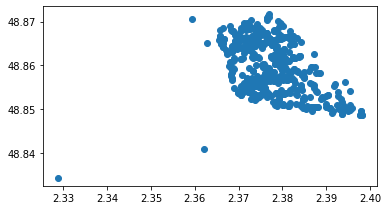

In [148]:
cvx_hull = gdf_resto_paris[gdf_resto_paris["Arrondissement"] == 11].convex_hull
cvx_hull.plot()

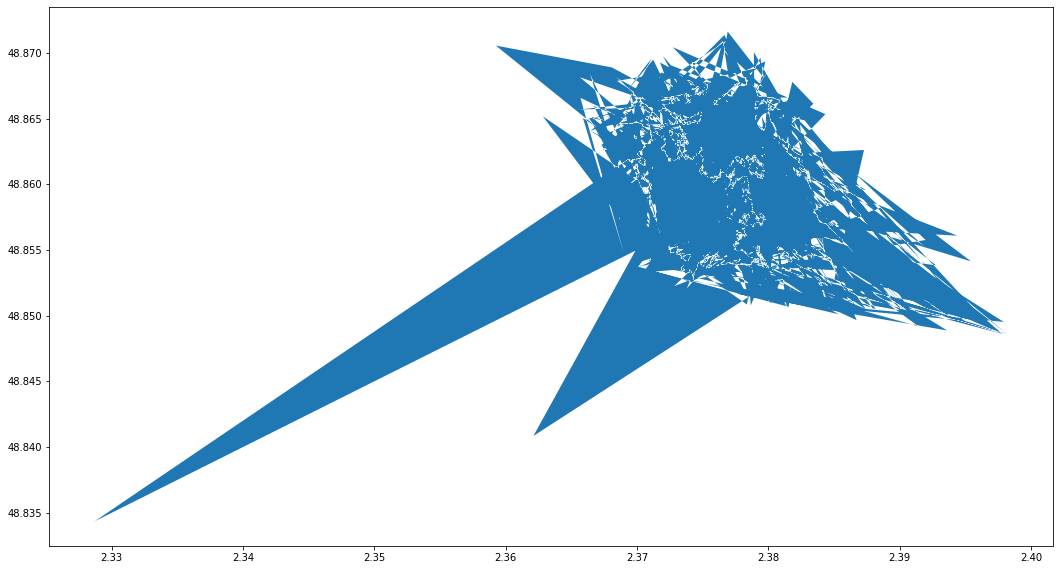

In [149]:
from shapely.geometry import Point, LineString, Polygon

convex_shell = Polygon([[p.x, p.y] for p in cvx_hull])
shell = gpd.GeoSeries(convex_shell)
shell.plot(figsize = (18, 13))
plt.show()

In [182]:
points = gpd.GeoSeries(list(arbre_paris["geometry"]))
poly = gpd.GeoSeries(shell)

selection_arbre_onzieme = arbre_paris[points.intersects(poly.unary_union)]

In [183]:
labels, counts = np.unique(selection_arbre_onzieme["genre"], return_counts=True)
labels[np.where(counts == max(counts))]

array(['Platanus'], dtype=object)

Text(0.5, 1.0, 'Représentation des plantations en bleu et des établissement demandeurs de térasse en orange')

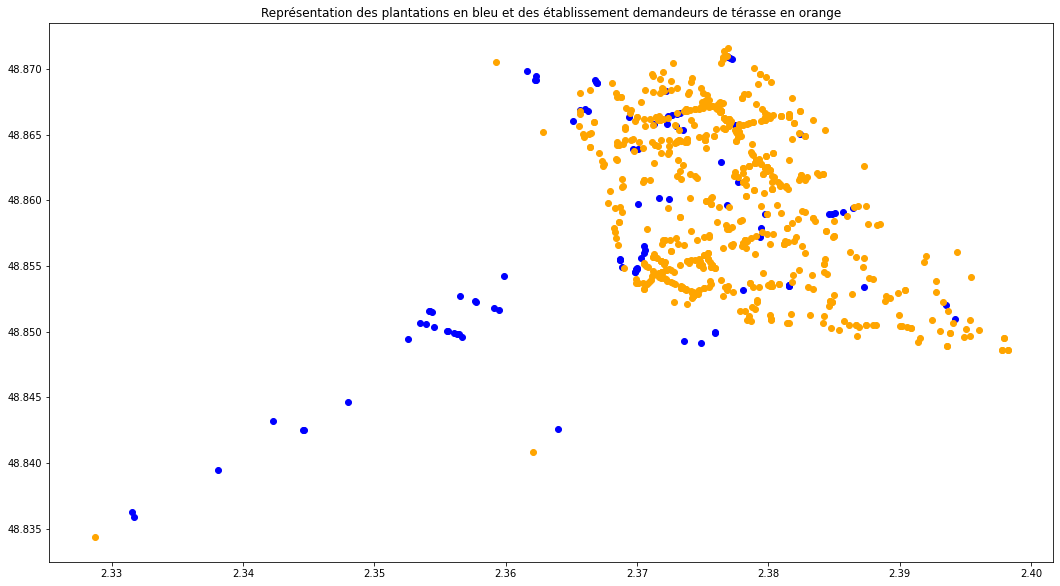

In [186]:
fig, ax = plt.subplots(figsize = (18,13)) 
selection_arbre_onzieme.plot(ax=ax, label="Arbres plantés à Paris", color = "blue")
cvx_hull.plot(ax=ax, label="Etablissement demandeur de", color = "orange")
ax.set_title("Représentation des plantations en bleu et des établissement demandeurs de térasse en orange")